| |
| :-: | 
| Competition: [Link](https://www.kaggle.com/competitions/playground-series-s4e2) |

In [26]:
# import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
# read the training set 
df_train = pd.read_csv('./playground-series-s4e2/train.csv')

df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [28]:
# check for missing values in the training set
df_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [29]:
# check for literal values in the training set 
df_train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [30]:
# get all the columns that don't have numerical values (dtype as object)
categorical_columns = [col for col in df_train.columns if df_train[col].dtype == 'object']

categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [31]:
# get the unique values in the categorical columns
for col in categorical_columns:
    print(f'{col}: {df_train[col].unique()}')


Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [32]:
# convert the categorical columns to numerical values by label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])

df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,3
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,0
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,3
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,6


In [33]:
# print the unique values in the categorical columns after label encoding
for col in categorical_columns:
    print(f'{col}: {df_train[col].unique()}')

Gender: [1 0]
family_history_with_overweight: [1 0]
FAVC: [1 0]
CAEC: [2 1 3 0]
SMOKE: [0 1]
SCC: [0 1]
CALC: [1 2 0]
MTRANS: [3 0 4 2 1]
NObeyesdad: [6 1 0 4 3 5 2]


<AxesSubplot:>

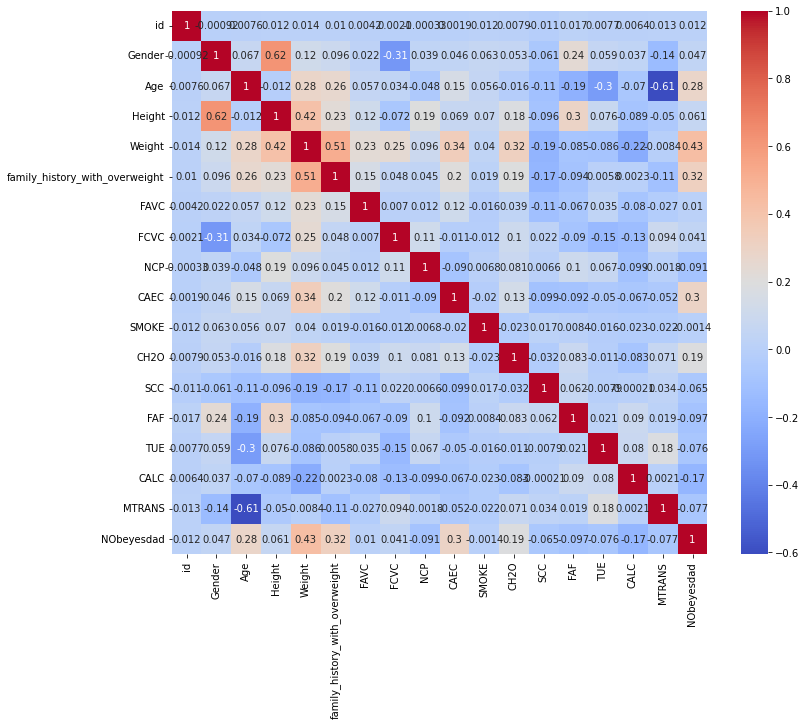

In [34]:
# plot a correlation matrix
import seaborn as sns

corr = df_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [35]:
# split the training set into features and target variable
X = df_train.drop(['id', 'NObeyesdad'], axis=1)
y = df_train['NObeyesdad']

In [36]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0


In [37]:
y

0        6
1        1
2        0
3        4
4        6
        ..
20753    3
20754    0
20755    3
20756    6
20757    3
Name: NObeyesdad, Length: 20758, dtype: int32

In [38]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# make predictions on the validation set
y_pred = rf.predict(X_val)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

0.8959537572254336

In [49]:
# train a XGBRegressor  model

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

xgb_model.fit(X_train, y_train)

# make predictions on the validation set
y_pred = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

accuracy

0.9002890173410405

In [39]:
# read the test set
df_test = pd.read_csv('./playground-series-s4e2/test.csv')

df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [40]:
# perform label encoding on the categorical columns in the test set
categorical_columns = [col for col in df_test.columns if df_test[col].dtype == 'object']

label_encoder2 = LabelEncoder()

for col in categorical_columns:
    df_test[col] = label_encoder2.fit_transform(df_test[col])

df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,1,23.327836,1.721384,78.030383,1,0,2.813234,3.000000,2,0,1.000000,0,0.807076,0.778632,2,3
13836,34594,0,29.000000,1.590000,62.000000,0,1,3.000000,3.000000,2,0,2.000000,0,0.000000,0.000000,2,3
13837,34595,0,22.935612,1.585547,44.376637,0,1,3.000000,2.273740,1,0,2.000000,0,1.949840,1.000000,2,3
13838,34596,1,21.000000,1.620000,53.000000,1,1,2.000000,3.000000,2,0,2.000000,0,3.000000,2.000000,3,3


In [41]:
# make predictions on the test set

y_test = rf.predict(df_test.drop('id', axis=1))

# perform inverse label encoding on the predictions
y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [50]:
# make predicitions on the test set using xgb model

y_test = xgb_model.predict(df_test.drop('id', axis=1))

# perform inverse label encoding on the predictions
y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [51]:
# create a submission dataframe

submission = pd.DataFrame({'id': df_test['id'], 'NObeyesdad': y_test})

submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [48]:
# save the submission dataframe to a csv file

submission.to_csv('submission.csv', index=False)

TODO: To improve the accuracy we can try the following:

Feature Engineering, PCA and visualize how data is correlated

Normalization

KNN, Multi Dimensional SVM

Hyperparameter tuning for Xgboost, Random Forest